In [4]:

class BreastCancer(object):
    
    def __init__(self):
        from sklearn.datasets import load_breast_cancer
        df = load_breast_cancer()
        self.df = df
        return
        
    def preprocess_df(self):
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler

        df = self.df
        self.features = df['data']
        self.target = df['target']   
        
        X_train, X_test, self.y_train, self.y_test = train_test_split(self.features,
                                                                      self.target,test_size=0.25,random_state=0)
        sc = StandardScaler()
        
        self.X_train = sc.fit_transform(X_train)
        self.X_test = sc.fit_transform(X_test)

    def train_ML_models(self):
        # --- Logistic Regression ---
        from sklearn.linear_model import LogisticRegression
        classifier =LogisticRegression(random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_LogReg = classifier.predict(self.X_test)

        # --- KNN Classification ---
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_KNN = classifier.predict(self.X_test)

        # --- SVM Classification ---
        from sklearn.svm import SVC
        classifier = SVC(kernel='linear', random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_SVC = classifier.predict(self.X_test)

        # --- SVC Classification ---
        from sklearn.svm import SVC
        classifier = SVC(kernel='rbf',random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_SVCrbf = classifier.predict(self.X_test)

        # --- Naive bayes Gaussian Classification ---
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_Gauss = classifier.predict(self.X_test)

        # --- Decision Tree Classification ---
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_tree = classifier.predict(self.X_test)

        # --- Random Forest Classification ---
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
        classifier.fit(self.X_train,self.y_train)
        self.y_pred_randomforest = classifier.predict(self.X_test)

    def compute_performance_evals(self):
        from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, accuracy_score
        # Confusion matrix
        self.cm_LogisticRegression = confusion_matrix(self.y_test, self.y_pred_LogReg)
        self.cm_KNN = confusion_matrix(self.y_test, self.y_pred_KNN)
        self.cm_svckernel = confusion_matrix(self.y_test, self.y_pred_SVC)
        self.cm_svcrbf = confusion_matrix(self.y_test, self.y_pred_SVCrbf)
        self.cm_Gaussian = confusion_matrix(self.y_test, self.y_pred_Gauss)
        self.cm_decisiontree = confusion_matrix(self.y_test, self.y_pred_tree)
        self.cm_randomforest = confusion_matrix(self.y_test, self.y_pred_randomforest)

        # recall score
        self.rs_LogisticRegression = recall_score(self.y_test, self.y_pred_LogReg)
        self.rs_KNN = recall_score(self.y_test, self.y_pred_KNN)
        self.rs_svckernel = recall_score(self.y_test, self.y_pred_SVC)
        self.rs_svcrbf = recall_score(self.y_test, self.y_pred_SVCrbf)
        self.rs_Gaussian = recall_score(self.y_test, self.y_pred_Gauss)
        self.rs_decisiontree = recall_score(self.y_test, self.y_pred_tree)
        self.rs_randomforest = recall_score(self.y_test, self.y_pred_randomforest)
        
        # precision score
        self.ps_LogisticRegression = precision_score(self.y_test, self.y_pred_LogReg)
        self.ps_KNN = precision_score(self.y_test, self.y_pred_KNN)
        self.ps_svckernel = precision_score(self.y_test, self.y_pred_SVC)
        self.ps_svcrbf = precision_score(self.y_test, self.y_pred_SVCrbf)
        self.ps_Gaussian = precision_score(self.y_test, self.y_pred_Gauss)
        self.ps_decisiontree = precision_score(self.y_test, self.y_pred_tree)
        self.ps_randomforest = precision_score(self.y_test, self.y_pred_randomforest)
        
        # roc auc score
        self.roc_auc_LogisticRegression = roc_auc_score(self.y_test, self.y_pred_LogReg)
        self.roc_auc_KNN = roc_auc_score(self.y_test, self.y_pred_KNN)
        self.roc_auc_svckernel = roc_auc_score(self.y_test, self.y_pred_SVC)
        self.roc_auc_svcrbf = roc_auc_score(self.y_test, self.y_pred_SVCrbf)
        self.roc_auc_Gaussian = roc_auc_score(self.y_test, self.y_pred_Gauss)
        self.roc_auc_decisiontree = roc_auc_score(self.y_test, self.y_pred_tree)
        self.roc_auc_randomforest = roc_auc_score(self.y_test, self.y_pred_randomforest)
        
        # accuracy score
        self.acc_LogisticRegression = accuracy_score(self.y_test, self.y_pred_LogReg)
        self.acc_KNN = accuracy_score(self.y_test, self.y_pred_KNN)
        self.acc_svckernel = accuracy_score(self.y_test, self.y_pred_SVC)
        self.acc_svcrbf = accuracy_score(self.y_test, self.y_pred_SVCrbf)
        self.acc_Gaussian = accuracy_score(self.y_test, self.y_pred_Gauss)
        self.acc_decisiontree = accuracy_score(self.y_test, self.y_pred_tree)
        self.acc_randomforest = accuracy_score(self.y_test, self.y_pred_randomforest)

    def cross_val_pred(self):
        from sklearn.model_selection import cross_val_predict
        import scikitplot as skplt
        import matplotlib.pyplot as plt
        from sklearn.ensemble import RandomForestClassifier
        randomforest_cs = RandomForestClassifier(n_estimators=5, max_depth=5,
                                                 criterion='entropy',random_state=0)
        pred_LogisticRegression = cross_val_predict(randomforest_cs, self.features, self.target)
        
        skplt.metrics.plot_confusion_matrix(self.target, pred_LogisticRegression, normalize=True,)
        plt.show()
        

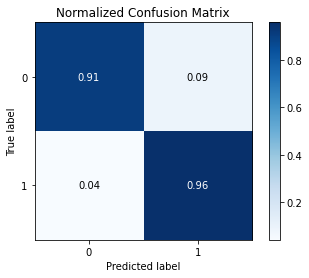

In [5]:
brst_cancer_ml_model  = BreastCancer()
brst_cancer_ml_model.preprocess_df()
brst_cancer_ml_model.train_ML_models()
brst_cancer_ml_model.compute_performance_evals()
brst_cancer_ml_model.cross_val_pred()